<a href="https://colab.research.google.com/github/saharCoder/MachineLearning/blob/main/BankChurn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def skeweness(column):
   mean=np.mean(df[column])
   median=np.median(df[column])
   print("The mean: ",mean)
   #calculating the median
   print("The median: ",median)
   if mean>median:
     print('The data more likely to be skewed to the RIGHT!')
   else:
     print('The data more likely to be skewed to the LEFT!')

def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    fig, ax = pt.subplots(figsize=(5, 4))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    pt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    pt.title(f'{column_str} histogram');


def boxplotter(column,xlabel,title): # Box plot
  fig, ax = pt.subplots(figsize=(5, 4))
  box = sns.boxplot(x=df[column])
  g = pt.gca()
  #box.set_xticklabels(np.array([readable_numbers(x) for x in g. 􏰀→get_xticks()]))
  pt.xlabel(xlabel)
  pt.title(title)
  pt.show()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#! mkdir ~/.kaggle
#! cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets download bhuviranga/customer-churn-data


Mounted at /content/gdrive


In [3]:
#! unzip customer-churn-data.zip

### Importing and Loading the Dataset

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [82]:
df=pd.read_csv('/content/gdrive/MyDrive/Churn_Modelling.csv')

### Data Exploration

In [83]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
#How many rows and columns are there in the dataset?
print("There are ",df.shape[0]," Rows, and ",df.shape[1],' Columns')

There are  10000  Rows, and  14  Columns


In [85]:
#What are the columns?
features=list(df.columns)
features

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

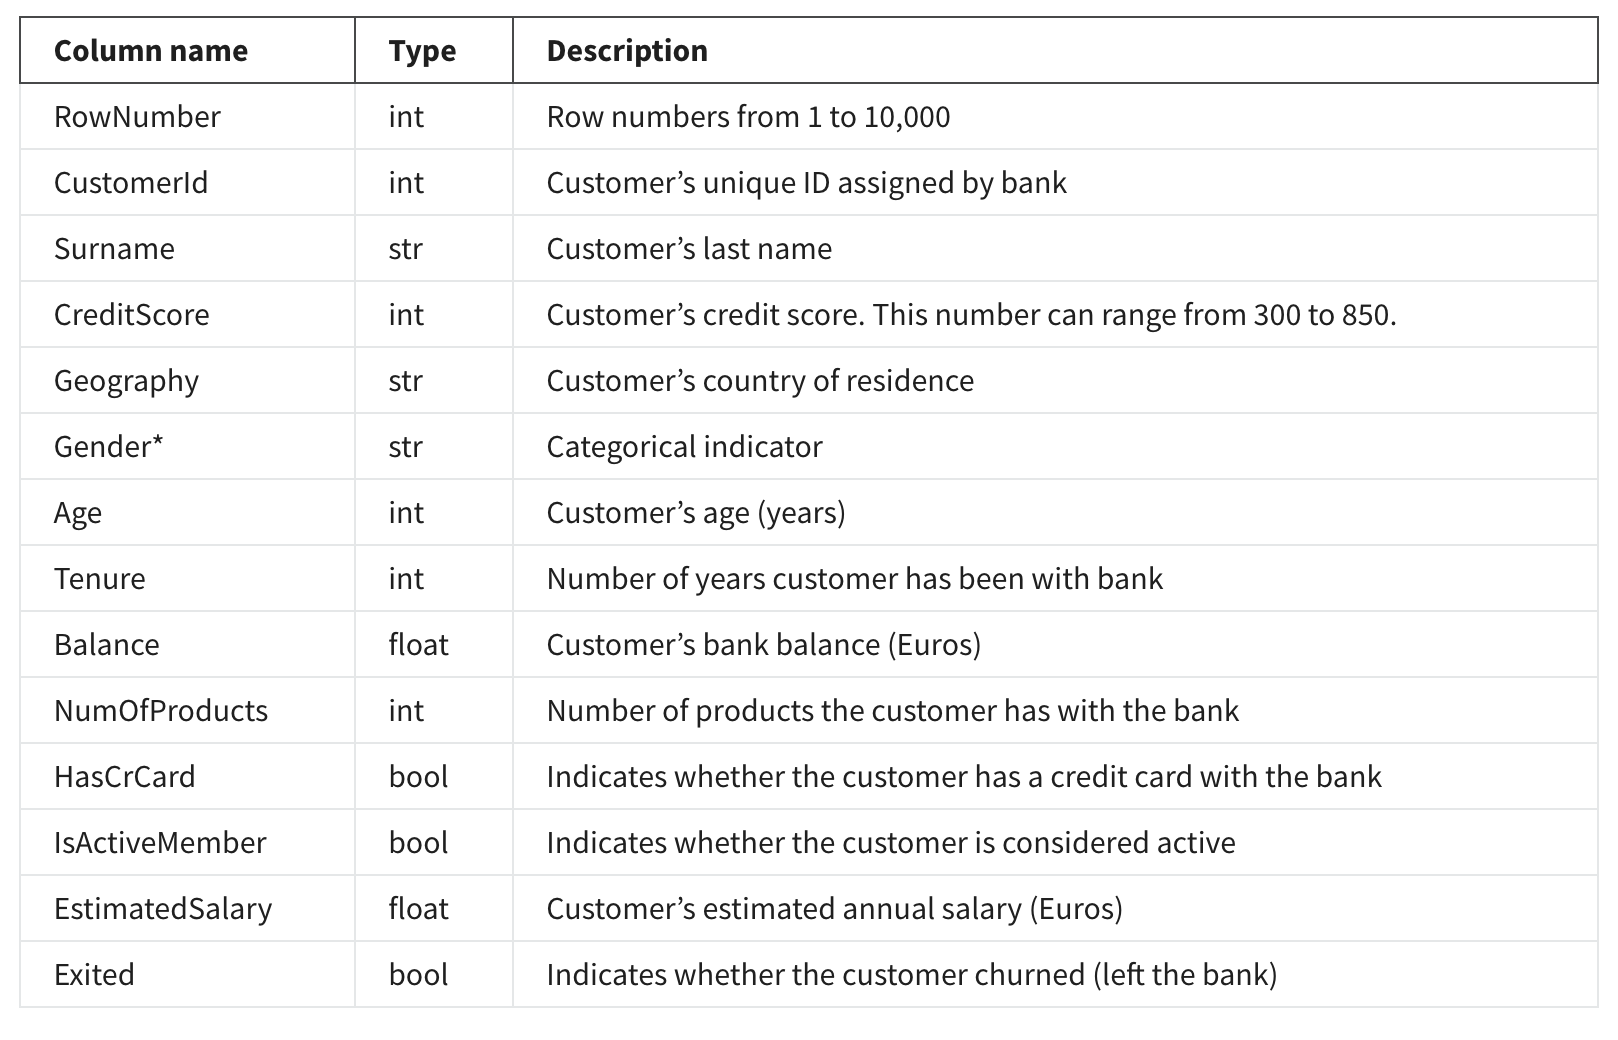

In [86]:
#What are the data types presented?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Three catogirical data:
- Gender
- IsActive
- Churn
- HasCCarad

## Data Cleaning

### Duplicated

In [87]:
print('Number of duplicated rows: ',df.duplicated().sum())

Number of duplicated rows:  0


### Null values

In [88]:
print('Number of Null values: ',df.isnull().sum().sum())

Number of Null values:  0


## Feature Engineering:

### Feature Selection



Feature Selection process:
- What kind of model we need? Classification model
- Target variable: Churn variable
- Collection of features that you think might help predict on your chosen target
[CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

 - Gender is also can be dropped as we do not want to build a biased model based on customer gender

In [89]:
df.drop(['RowNumber','CustomerId','Surname', 'Gender'],axis=1,inplace=True)

In [90]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


### Feature Extraction

In [91]:
#New column can be extracted from the age and the years for a customer in the bank:
df['portioninage']=df['Tenure']/df['Age']

In [92]:
(df[['Age', 'Tenure','portioninage']])

,Age,Tenure,portioninage
0,42,2,0.047619
1,41,1,0.024390
2,42,8,0.190476
3,39,1,0.025641
4,43,2,0.046512
...,...,...,...
9995,39,5,0.128205
9996,35,10,0.285714
9997,36,7,0.194444
9998,42,3,0.071429


### Feature Transformation

In [93]:
#Make variables values fall into smaller range using some scalling method:
scaler = MinMaxScaler()
#we need to check first if the column fall into normal distribution or not

## Exploring each variable

### Age

In [94]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

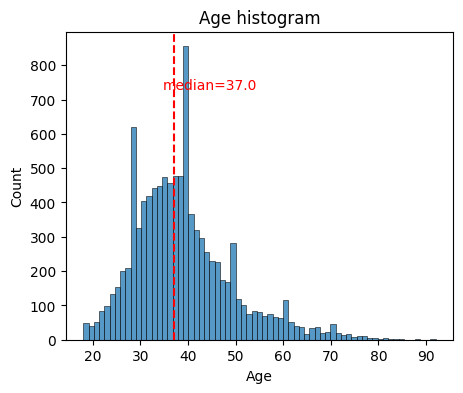

In [95]:
histogrammer('Age',True)

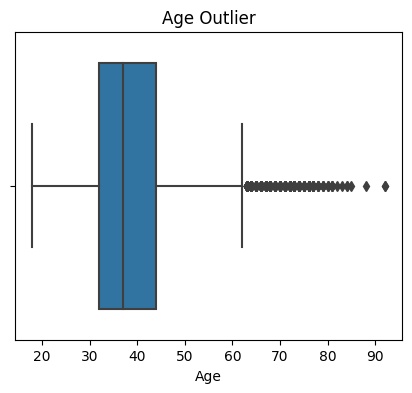

In [96]:
boxplotter('Age','Age','Age Outlier')

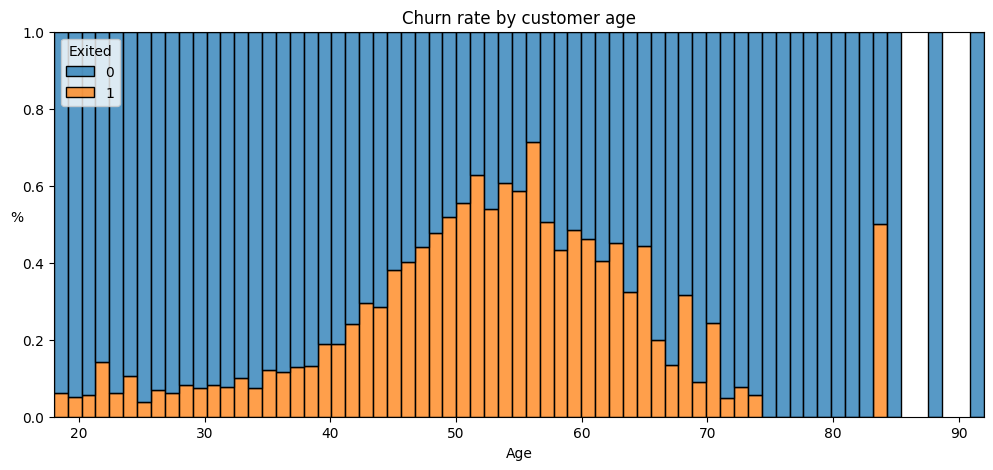

In [97]:
#Plot churn rate by Age:
# Histogram
pt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='Age',
             #bins=range(0,1201,20), #this is to specify the range to get only users drove at most 1200 km
             hue='Exited',
             multiple='fill',
             )
pt.ylabel('%', rotation=0)
pt.title('Churn rate by customer age');

The churn rate increase as the customer get older, then comes back to drop. There is also some extreme values for customer more than 75 years old

bins= [-1,0,2,4,13,20, 110]
labels = ['unknown','Infant','Toddler','Kid','Teen', 'Adult']
X_train_data['AgeGroup'] = pd.cut(X_train_data['Age'], bins=bins, labels=labels, right=False)


customer from 18 to 35 have low churn rate, to 56 years customer the churn rate raise, then fall back again for customer aging 57 to 74 and more

In [98]:
df['age_by_decade'] = pd.cut(x=df['Age'], bins=[18,20, 29, 39, 49,59,69,79,89,99], labels=['18s','20s', '30s', '40s','50s','60s','70s','80s','90s'])

In [99]:
(df[['Age', 'age_by_decade']]).tail()

,Age,age_by_decade
9995,39,30s
9996,35,30s
9997,36,30s
9998,42,40s
9999,28,20s


In [100]:
df['age_by_decade'].value_counts()

30s    4346
40s    2618
20s    1552
50s     869
60s     375
70s     136
18s      67
80s      13
90s       2
Name: age_by_decade, dtype: int64

In [101]:
def pirplotter(data,keys):
    # define Seaborn color palette to use
    palette_color = sns.color_palette('bright')

    # plotting data on chart
    pt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

    # displaying chart
    pt.show()

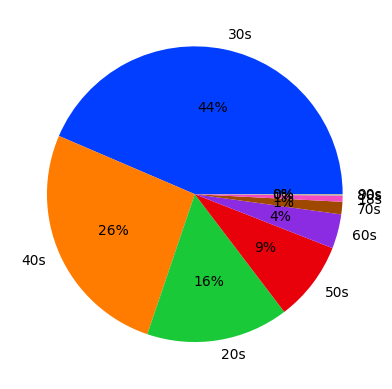

In [102]:
# Pie chart
keys=list(df['age_by_decade'].value_counts().index)
data=list(df['age_by_decade'].value_counts().values)
pirplotter(data,keys)

<BarContainer object of 9 artists>

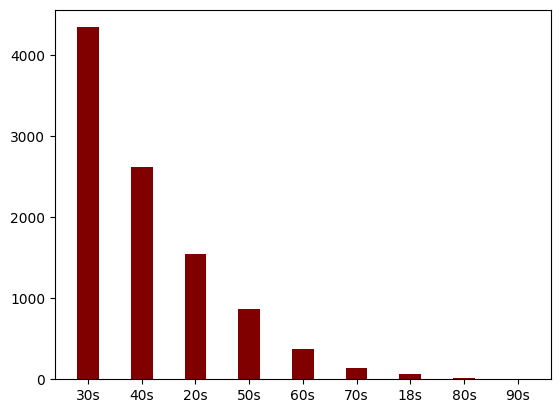

In [103]:
pt.bar(keys, data, color ='maroon',
        width = 0.4)

### Outcome variable "Exist" balance

## Label Encoding

In [104]:
glopal_val=df.groupby('Geography',as_index=False).sum('Exited')

In [105]:
import plotly.express as px
px.scatter_geo(glopal_val, locations='Geography', size='Exited', locationmode='country names', color='Geography')

In [106]:
glopal_val

,Geography,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,portioninage
0,France,3257437,193098,25093,3.113325e+08,7676,3543,2591,5.008945e+08,810,696.096300
1,Germany,1634497,99787,12570,3.004029e+08,3813,1791,1248,2.536936e+08,814,336.966803
2,Spain,1613354,96333,12465,1.531236e+08,3813,1721,1312,2.463143e+08,413,346.300408


<Axes: xlabel='Geography', ylabel='Exited'>

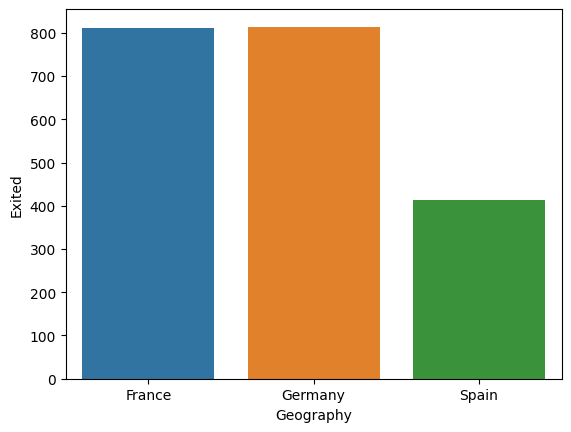

In [107]:
sns.barplot(x = 'Geography',
            y = 'Exited',
            data = glopal_val)

Why does spain has low churns compare with the other?
Perform hypothisis testing

In [108]:
df_dc = pd.get_dummies(df, columns=['Geography'],drop_first=True) #drop first will create 2 dummies instead of 3 for each catogry

In [109]:
df_dc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,portioninage,age_by_decade,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,40s,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,40s,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,40s,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,30s,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,40s,0,1


In [110]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_dc['age_by_decade']= label_encoder.fit_transform(df_dc['age_by_decade'])

In [112]:
df_dc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,portioninage,age_by_decade,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,3,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,3,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,2,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,3,0,1


<Axes: >

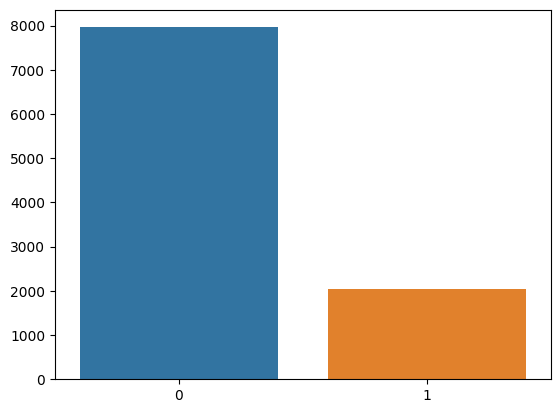

In [124]:
#class balance check
sns.barplot(x=df_dc['Exited'].value_counts().index,y=df_dc['Exited'].value_counts().values)


## Model Constructing

In [113]:
#importing the libraries:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#Model Metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [125]:
#Naiev bayes model works well when the variables are independent:
df_dc = df_dc.drop(['Tenure', 'Age'], axis=1)
df_dc.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,portioninage,age_by_decade,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,3,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,3,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,3,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,2,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,3,0,1


In [126]:
# Define the y (target) variable
y = df_dc['Exited']

# Define the X (predictor) variables
X = df_dc.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

In [127]:
#Unscaled model:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [128]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [129]:
#Scaled model:
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [133]:
X_train

array([[0.77      , 0.55719027, 0.33333333, ..., 0.44444444, 0.        ,
        0.        ],
       [0.336     , 0.40922653, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.444     , 0.43813186, 0.        , ..., 0.44444444, 1.        ,
        0.        ],
       ...,
       [0.634     , 0.32297505, 0.33333333, ..., 0.22222222, 0.        ,
        0.        ],
       [0.674     , 0.45435491, 0.33333333, ..., 0.22222222, 0.        ,
        1.        ],
       [0.904     , 0.        , 0.        , ..., 0.44444444, 0.        ,
        1.        ]])

In [130]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [131]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.821
Precision: 0.603
Recall: 0.352
F1 Score: 0.444


## Logistic Regression model

In [135]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [137]:
logisticModel=LogisticRegression(penalty='none').fit(X_train, y_train)
log_pred=logisticModel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



In [138]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, log_pred))
print('Precision:', '%.3f' % precision_score(y_test,log_pred))
print('Recall:', '%.3f' % recall_score(y_test, log_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, log_pred))

Accuracy: 0.810
Precision: 0.618
Recall: 0.175
F1 Score: 0.273


## Decision Tree Model

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dt_pred = dtc.predict(X_test)

In [140]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, dt_pred))
print('Precision:', '%.3f' % precision_score(y_test,dt_pred))
print('Recall:', '%.3f' % recall_score(y_test, dt_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, dt_pred))

Accuracy: 0.786
Precision: 0.475
Recall: 0.487
F1 Score: 0.481


## Random Forest Model

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rf_pred = rfc.predict(X_test)

In [142]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, rf_pred))
print('Precision:', '%.3f' % precision_score(y_test,rf_pred))
print('Recall:', '%.3f' % recall_score(y_test, rf_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, rf_pred))

Accuracy: 0.860
Precision: 0.760
Recall: 0.460
F1 Score: 0.573


##  Support Vector Machine (SVM) Model

In [143]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
sv_pred = svc.predict(X_test)

In [144]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, sv_pred))
print('Precision:', '%.3f' % precision_score(y_test,sv_pred))
print('Recall:', '%.3f' % recall_score(y_test, sv_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, sv_pred))

Accuracy: 0.845
Precision: 0.810
Recall: 0.310
F1 Score: 0.449


## KNN Model

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
kn_pred = knn.predict(X_test)

In [146]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, kn_pred))
print('Precision:', '%.3f' % precision_score(y_test,kn_pred))
print('Recall:', '%.3f' % recall_score(y_test, kn_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, kn_pred))

Accuracy: 0.832
Precision: 0.644
Recall: 0.387
F1 Score: 0.483
